In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
FILE_PATH = [
    "/workspace/plane-nerf/outputs/jackal_training_data_0/plane-nerf/2024-02-27_170140/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1/plane-nerf/2024-02-27_113348/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_2/plane-nerf/2024-02-27_133004/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_5/plane-nerf/2024-02-27_142300/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_10/plane-nerf/2024-02-27_153507/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_1/plane-nerf/2024-02-27_214558/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_2/plane-nerf/2024-02-27_222927/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_5/plane-nerf/2024-02-28_094653/metrics.csv",
    "/workspace/plane-nerf/outputs/jackal_training_data_10/plane-nerf/2024-02-28_102732/metrics.csv"
]
# Open csv file as np array
data = []
for i in range(len(FILE_PATH)):
    data.append(np.genfromtxt(FILE_PATH[i], delimiter=',', names=['psnr', 'ssim', 'lpips',"psnr_masked", "ssim_masked", "lpips_masked"]))
    data[i] = np.array([list(data[i][j]) for j in range(len(data[i]))])
data = np.array(data)
# Mean PSNR
mean_psnr = np.mean(data[:,:,0], axis=1)
# Mean SSIM
mean_ssim = np.mean(data[:,:,1], axis=1)
# Mean LPIPS
mean_lpips = np.mean(data[:,:,2], axis=1)
print(f"Mean PSNR: {mean_psnr}")
print(f"Mean SSIM: {mean_ssim}")
print(f"Mean LPIPS: {mean_lpips}")

Mean PSNR: [17.87741534 18.60163692 19.90356619 21.36870871 22.06980847 21.10016492
 21.7360168  21.50538378 22.50567039]
Mean SSIM: [0.59743284 0.54596922 0.50946609 0.39420654 0.38507087 0.48177078
 0.46702057 0.45621613 0.38565863]
Mean LPIPS: [0.65813852 0.61164386 0.7629313  0.89245233 0.87709802 0.87792111
 0.87450522 0.86933876 0.88019684]


Text(0, 0.5, 'LPIPS (Full)')

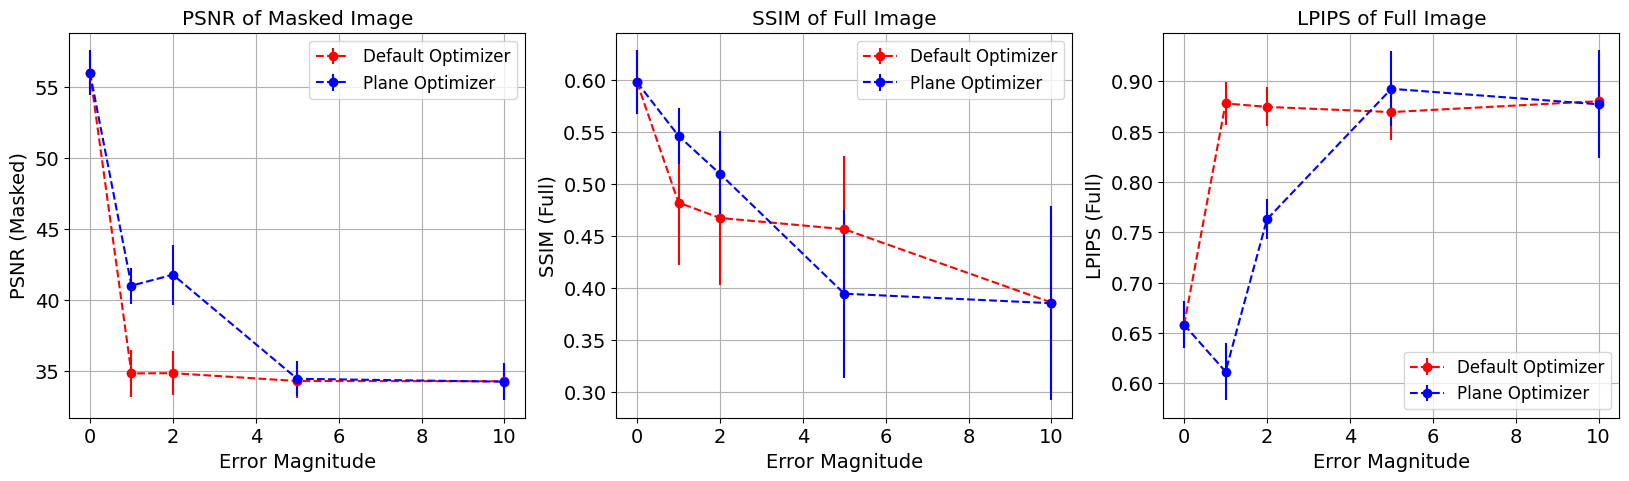

In [4]:
error_magnitude = [0, 1, 2, 5 ,10]

psnr_masked_plane = data[:,:,3]
psnr_masked_plane = psnr_masked_plane[:5,:]

psnr_masked_default = data[:,:,3]
psnr_masked_default = np.concatenate((psnr_masked_default[0:1,:], psnr_masked_default[5:,:]), axis=0)

ssim_plane = data[:,:,1]
ssim_plane = ssim_plane[:5,:]

ssim_default = data[:,:,1]
ssim_default = np.concatenate((ssim_default[0:1,:], ssim_default[5:,:]), axis=0)

lpips_plane = data[:,:,2]
lpips_plane = lpips_plane[:5,:]

lpips_default = data[:,:,2]
lpips_default = np.concatenate((lpips_default[0:1,:], lpips_default[5:,:]), axis=0)

#Plot 3 graphs for PSNR, SSIM, LPIPS side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

#Increase font size
plt.rcParams.update({'font.size': 12})

#Increase font size of axis
for ax in axs:
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(14)

# PSNR

axs[0].errorbar(error_magnitude, np.mean(psnr_masked_default, axis=1), np.std(psnr_masked_default, axis=1), label="Default Optimizer", color='r', linestyle='--', marker='o')
axs[0].errorbar(error_magnitude, np.mean(psnr_masked_plane, axis=1), np.std(psnr_masked_plane, axis=1), label="Plane Optimizer", color='b', linestyle='--', marker='o')
axs[0].grid(True)
axs[0].legend()
axs[0].set_title('PSNR of Masked Image')
axs[0].set_xlabel('Error Magnitude')
axs[0].set_ylabel('PSNR (Masked)')

# SSIM

axs[1].errorbar(error_magnitude, np.mean(ssim_default, axis=1), np.std(ssim_default, axis=1), label="Default Optimizer", color='r', linestyle='--', marker='o')
axs[1].errorbar(error_magnitude, np.mean(ssim_plane, axis=1), np.std(ssim_plane, axis=1), label="Plane Optimizer", color='b', linestyle='--', marker='o')
axs[1].grid(True)
axs[1].legend()
axs[1].set_title('SSIM of Full Image')
axs[1].set_xlabel('Error Magnitude')
axs[1].set_ylabel('SSIM (Full)')

# LPIPS

axs[2].errorbar(error_magnitude, np.mean(lpips_default, axis=1), np.std(lpips_default, axis=1), label="Default Optimizer", color='r', linestyle='--', marker='o')
axs[2].errorbar(error_magnitude, np.mean(lpips_plane, axis=1), np.std(lpips_plane, axis=1), label="Plane Optimizer", color='b', linestyle='--', marker='o')
axs[2].grid(True)
axs[2].legend(loc="lower right")
axs[2].set_title('LPIPS of Full Image')
axs[2].set_xlabel('Error Magnitude')
axs[2].set_ylabel('LPIPS (Full)')

